Step 1: Set Up the Environment

In [4]:
# Install necessary libraries (this is usually not required in Google Colab as these libraries are pre-installed)
!pip install tensorflow keras numpy pandas matplotlib seaborn

# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import random

In [5]:
# Load the dataset
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

print("X_train shape", train_images.shape)
print("y_train shape", train_labels.shape)
print("X_test shape", test_images.shape)
print("y_test shape", test_labels.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


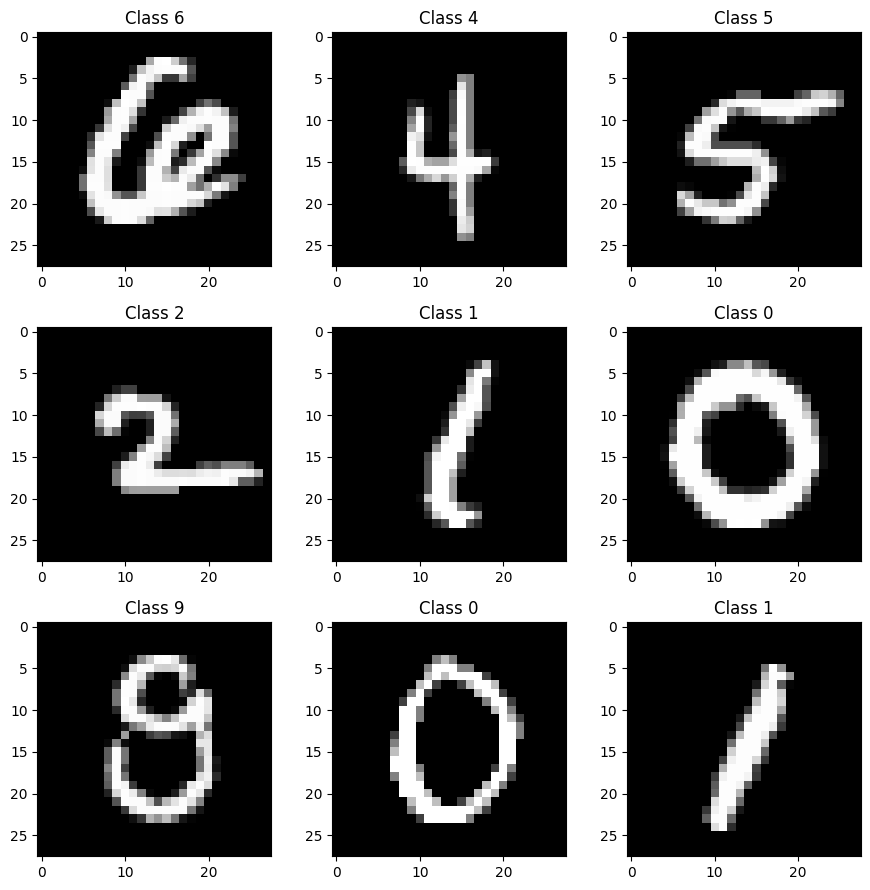

In [6]:
plt.rcParams['figure.figsize'] = (9,9) # Make the figures a bit bigger

for i in range(9):
    plt.subplot(3,3,i+1)
    num = random.randint(0, len(train_images))
    plt.imshow(train_images[num], cmap='gray', interpolation='none')
    plt.title("Class {}".format(train_labels[num]))

plt.tight_layout()

In [8]:
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Reshape the images to the format (batch_size, height, width, channels)
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

In [11]:
# CNN architecture with one convolutional layer, one pooling layer, and one dense layer
model = models.Sequential([
    # Convolutional layer
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    # Pooling layer
    layers.MaxPooling2D(pool_size=(2, 2)),
    # Flattening the 3D output to 1D
    layers.Flatten(),
    # Dense layer for classification
    layers.Dense(units=64, activation='relu'),
    # Output layer with 10 units for each class (digits 0-9)
    layers.Dense(units=10, activation='softmax')
])


# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [12]:
# Train the model
history = model.fit(train_images, train_labels, epochs=5,
                    validation_data=(test_images, test_labels))

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 [==============================] - 39s 20ms/step - loss: 0.1645 - accuracy: 0.9518 - val_loss: 0.0620 - val_accuracy: 0.9813
Epoch 2/5
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0579 - accuracy: 0.9826 - val_loss: 0.0522 - val_accuracy: 0.9822
Epoch 3/5
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0395 - accuracy: 0.9877 - val_loss: 0.0420 - val_accuracy: 0.9866
Epoch 4/5
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0280 - accuracy: 0.9912 - val_loss: 0.0440 - val_accuracy: 0.9854
Epoch 5/5
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0200 - accuracy: 0.9940 - val_loss: 0.0498 - val_accuracy: 0.9856


In [13]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)


313/313 - 2s - loss: 0.0498 - accuracy: 0.9856 - 2s/epoch - 5ms/step

Test accuracy: 0.9855999946594238


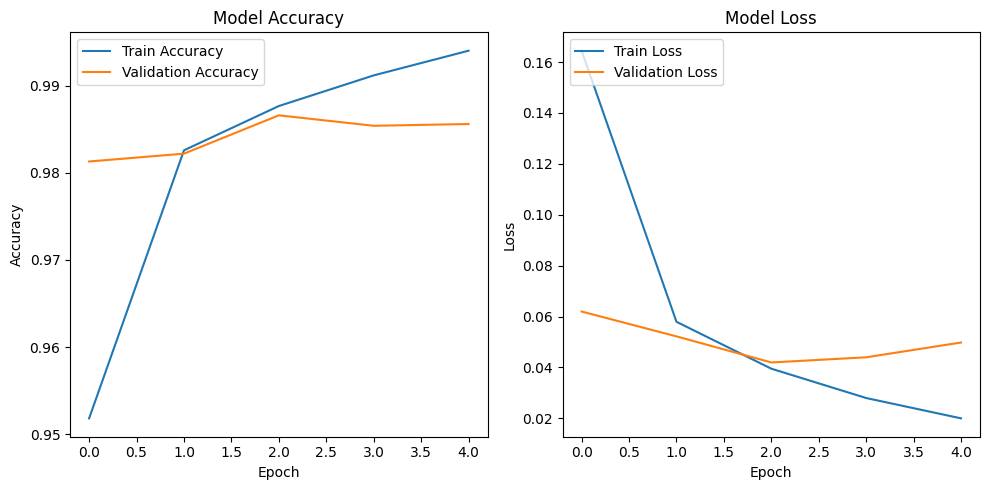

In [14]:
# Plot training & validation accuracy values
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()